In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn


from scipy import stats  # 통계

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import load_boston
from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score  # 정확도 (모델 평가)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.svm import SVC

from sklearn.base import BaseEstimator

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBRegressor

from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [5]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [ ]:
# skiprows=1
# header=1

In [ ]:
# 필요한 행 x: 대여일자, 대여소번호, 운동량, 탄소량
# 필요한 행 y: 연령대코드(형식통일), 이용건수, 이동거리(M), 이동시간(분)
# 날릴 행: 

# 1. 같은 형식끼리 묶어(concat), 한번에 전처리
## - 연령대 코드 통일, 
# 2. 하나로 묶어 필요없는 행 날리고 형식 통일
## - 대여일자 int 방식, 요일 정보 생성?, 

# 대여소정보 파일과 on 대여소번호로 구정보 innermerge?

In [8]:
for i in range(1,13):
    
    df = pd.read_csv('./d/서울특별시 공공자전거 이용정보(시간대별)_21_{}.csv'.format(i))
    
    df.drop(['대여소명', '성별', '대여구분코드'], axis=1, inplace=True)
    
    df.to_csv('21.{}.csv'.format(i))

In [8]:
rent19 = pd.read_csv('./d/19.1.csv')
rent19.drop('Unnamed: 0', axis=1, inplace=True)

for i in range(1,13):
    
    df = pd.read_csv('./d/19.{}.csv'.format(i))
    df.drop('Unnamed: 0', axis=1, inplace=True)
        
    rent19 = pd.concat([rent19,df], ignore_index = True)
    
rent19

,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-01-01,0,458,~10대,1,41.96,0.38,1630.0,29
1,2019-01-01,0,2159,20대,1,27.23,0.29,1250.0,7
2,2019-01-01,0,1362,20대,1,20.18,0.23,980.0,5
3,2019-01-01,0,3106,20대,1,7.48,0.1,420.0,4
4,2019-01-01,0,118,20대,1,25.7,0.26,1100.0,7
...,...,...,...,...,...,...,...,...,...
14584086,2019-12-31,23,544,~10대,4,340.36,3.12,13430.0,146
14584087,2019-12-31,23,337,20대,2,106.35,0.87,3730.0,26
14584088,2019-12-31,23,428,20대,2,77.82,0.91,3930.0,62
14584089,2019-12-31,23,1059,~10대,2,179.67,1.62,6980.0,116


In [9]:
rent20 = pd.read_csv('./d/20.1.csv')
rent20.drop('Unnamed: 0', axis=1, inplace=True)

for i in range(1,13):
    
    df = pd.read_csv('./d/20.{}.csv'.format(i))
    df.drop('Unnamed: 0', axis=1, inplace=True)
        
    rent20 = pd.concat([rent20,df], ignore_index = True)
    
rent20

,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2020-01-01,0,1044,~10대,1,33.96,0.30,1280.00,6
1,2020-01-01,0,1656,~10대,1,40.15,0.39,1690.00,6
2,2020-01-01,0,1337,~10대,1,80.88,0.50,2150.00,12
3,2020-01-01,0,1984,~10대,1,47.36,0.43,1840.00,25
4,2020-01-01,0,2601,~10대,1,29.34,0.26,1140.00,5
...,...,...,...,...,...,...,...,...,...
19732366,2020-12-31,23,3121,30대,1,0.00,0.00,0.00,13
19732367,2020-12-31,23,560,30대,1,0.00,0.00,0.00,52
19732368,2020-12-31,23,1416,30대,1,18.33,0.17,711.99,4
19732369,2020-12-31,23,1625,50대,1,20.52,0.15,647.86,7


In [10]:
rent21 = pd.read_csv('./d/21.1.csv')
rent21.drop('Unnamed: 0', axis=1, inplace=True)

for i in range(1,13):
    
    df = pd.read_csv('./d/21.{}.csv'.format(i))
    df.drop('Unnamed: 0', axis=1, inplace=True)
        
    rent21 = pd.concat([rent21,df], ignore_index = True)
    
rent21

,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,~10대,2,28.90,0.23,992.78,13.0
1,2021-01-01,0,1349,~10대,1,34.38,0.26,1127.50,10.0
2,2021-01-01,0,1168,~10대,1,0.00,0.00,0.00,7.0
3,2021-01-01,0,2619,~10대,1,38.75,0.38,1658.34,14.0
4,2021-01-01,0,536,~10대,1,12.96,0.17,743.88,5.0
...,...,...,...,...,...,...,...,...,...
26140666,2021-12-31,23,4561,50대,1,22.95,0.19,840.00,4.0
26140667,2021-12-31,23,815,50대,1,30.20,0.21,907.98,8.0
26140668,2021-12-31,23,2173,60대,1,64.55,0.48,2063.26,13.0
26140669,2021-12-31,23,2718,60대,1,27.84,0.22,950.00,8.0


In [ ]:
rent21 = rent21.drop('Unnamed: 0', axis=1)

In [31]:
rent = pd.concat([rent19,rent20,rent21], ignore_index = True)

In [12]:
rent.to_csv('rent.csv')

In [61]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935901 entries, 0 to 58935900
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   연령대코드   object 
 4   이용건수    object 
 5   운동량     object 
 6   탄소량     object 
 7   이동거리    float64
 8   사용시간    float64
 9   자치구     object 
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ GB


In [62]:
rent = rent.drop('연령대코드', axis=1)

MemoryError: Unable to allocate 2.20 GiB for an array with shape (5, 58935901) and data type object

In [34]:
gu = pd.read_csv('공공자전거 대여소 정보.csv', encoding='cp949', header=4)
gu

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,2022-05-03,NaN,15.0,QR
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,2022-05-03,NaN,14.0,QR
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,2022-05-12,NaN,13.0,QR
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,2015-09-06,NaN,5.0,QR
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,2022-05-12,NaN,12.0,QR
...,...,...,...,...,...,...,...,...,...,...
2648,5851,도림천 건널목 위,영등포구,영등포구 대림동 646-1,37.502083,126.893188,2022-02-08,NaN,15.0,QR
2649,5852,대림동현대2차 201동 앞,영등포구,영등포구 대림동 640-2,37.503006,126.893829,2022-02-08,NaN,7.0,QR
2650,5853,여의도역2번출구 앞,영등포구,여의도동 의사당대로 88,37.522610,126.923012,2022-05-11,NaN,10.0,QR
2651,5854,신한금융투자 앞,영등포구,여의대로 70,37.525089,126.924080,2022-06-09,NaN,26.0,QR


In [35]:
gu = gu[['Unnamed: 0','Unnamed: 2']]

In [36]:
gu = gu.rename(columns={'Unnamed: 0':'대여소번호','Unnamed: 2':'자치구'})

In [37]:
gu

,대여소번호,자치구
0,102,마포구
1,103,마포구
2,104,마포구
3,105,마포구
4,106,마포구
...,...,...
2648,5851,영등포구
2649,5852,영등포구
2650,5853,영등포구
2651,5854,영등포구


In [32]:
rent

,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-01-01,0,458,~10대,1,41.96,0.38,1630.00,29.0
1,2019-01-01,0,2159,20대,1,27.23,0.29,1250.00,7.0
2,2019-01-01,0,1362,20대,1,20.18,0.23,980.00,5.0
3,2019-01-01,0,3106,20대,1,7.48,0.1,420.00,4.0
4,2019-01-01,0,118,20대,1,25.7,0.26,1100.00,7.0
...,...,...,...,...,...,...,...,...,...
60457128,2021-12-31,23,4561,50대,1,22.95,0.19,840.00,4.0
60457129,2021-12-31,23,815,50대,1,30.20,0.21,907.98,8.0
60457130,2021-12-31,23,2173,60대,1,64.55,0.48,2063.26,13.0
60457131,2021-12-31,23,2718,60대,1,27.84,0.22,950.00,8.0


In [38]:
rent = pd.merge(rent, gu, on='대여소번호', how='inner')

In [39]:
rent

,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,자치구
0,2019-01-01,0,458,~10대,1,41.96,0.38,1630.00,29.0,종로구
1,2019-01-01,0,458,50대,1,52.89,0.49,2120.00,13.0,종로구
2,2019-01-01,0,458,50대,1,53.54,0.48,2080.00,11.0,종로구
3,2019-01-01,2,458,20대,2,237.06,2.13,9210.00,56.0,종로구
4,2019-01-01,16,458,30대,1,25.23,0.23,980.00,6.0,종로구
...,...,...,...,...,...,...,...,...,...,...
58935896,2021-12-31,15,3886,40대,1,100.25,0.71,3050.00,28.0,광진구
58935897,2021-12-31,16,3886,40대,1,12.47,0.10,420.00,3.0,광진구
58935898,2021-12-31,16,3886,20대,1,37.84,0.34,1470.18,35.0,광진구
58935899,2021-12-31,17,3886,40대,1,0.00,0.00,0.00,7.0,광진구


In [40]:
rent.to_csv('rent.csv')

In [ ]:
L = []

for d in wd['날짜']:
    if 'start' in d:
        s= d.split(':')[1][:6]
    t =s+d
    L.append(t)

In [ ]:
re

In [41]:
pd.read_csv('rent.csv')

,Unnamed: 0,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,자치구
0,0,2019-01-01,0,458,~10대,1.0,41.96,0.38,1630.00,29.0,종로구
1,1,2019-01-01,0,458,50대,1.0,52.89,0.49,2120.00,13.0,종로구
2,2,2019-01-01,0,458,50대,1.0,53.54,0.48,2080.00,11.0,종로구
3,3,2019-01-01,2,458,20대,2.0,237.06,2.13,9210.00,56.0,종로구
4,4,2019-01-01,16,458,30대,1.0,25.23,0.23,980.00,6.0,종로구
...,...,...,...,...,...,...,...,...,...,...,...
58935896,58935896,2021-12-31,15,3886,40대,1,100.25,0.71,3050.00,28.0,광진구
58935897,58935897,2021-12-31,16,3886,40대,1,12.47,0.10,420.00,3.0,광진구
58935898,58935898,2021-12-31,16,3886,20대,1,37.84,0.34,1470.18,35.0,광진구
58935899,58935899,2021-12-31,17,3886,40대,1,0.00,0.00,0.00,7.0,광진구


In [42]:
wd = pd.read_csv('날씨통합.csv', index_col=0)
wd

,날짜,대여시간,기온,자치구
0,2019-01-01,0,-3.2,강남구
1,2019-01-01,1,-3.2,강남구
2,2019-01-01,2,-2.4,강남구
3,2019-01-01,3,-2.0,강남구
4,2019-01-01,4,-1.3,강남구
...,...,...,...,...
8766,2021-12-31,19,-8.8,중랑구
8767,2021-12-31,20,-9.0,중랑구
8768,2021-12-31,21,-9.1,중랑구
8769,2021-12-31,22,-9.2,중랑구


In [43]:
wd = wd.sort_values('날짜')

In [44]:
wd = wd.rename(columns = {'날짜':'대여일자'})
wd

,대여일자,대여시간,기온,자치구
0,2019-01-01,0,-3.2,강남구
4,2019-01-01,4,-1.7,성북구
3,2019-01-01,3,-1.7,성북구
2,2019-01-01,2,-2.4,성북구
1,2019-01-01,1,-3.6,성북구
...,...,...,...,...
8768,2021-12-31,21,-6.5,영등포구
8767,2021-12-31,20,-7.5,영등포구
8766,2021-12-31,19,-7.4,영등포구
8770,2021-12-31,23,-5.3,광진구


In [45]:
total = pd.merge(rent, wd, on=['대여일자','자치구','대여시간'], how='inner')

In [46]:
total

,대여일자,대여시간,대여소번호,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온
0,2019-01-01,0,458,~10대,1,41.96,0.38,1630.00,29.0,종로구,-4.8
1,2019-01-01,0,458,50대,1,52.89,0.49,2120.00,13.0,종로구,-4.8
2,2019-01-01,0,458,50대,1,53.54,0.48,2080.00,11.0,종로구,-4.8
3,2019-01-01,0,458,~10대,1,41.96,0.38,1630.00,29.0,종로구,-4.8
4,2019-01-01,0,458,50대,1,52.89,0.49,2120.00,13.0,종로구,-4.8
...,...,...,...,...,...,...,...,...,...,...,...
58935896,2021-11-08,7,4825,60대,1,24.00,0.23,1010.00,7.0,중랑구,6.5
58935897,2021-10-19,1,4633,30대,1,0.00,0.00,0.00,13.0,용산구,14.1
58935898,2021-11-21,22,4633,30대,1,24.03,0.20,842.77,5.0,용산구,5.4
58935899,2021-10-10,14,3973,50대,1,88.70,0.74,3200.00,80.0,금천구,15.6


In [50]:
total01 = total.drop('연령대코드', axis=1)

In [47]:
pd.get_dummies(total['연령대코드'])

,0.00,1,12.43,146.58,2,"20??,1""","20??,2""",20대,21.20,25.17,...,"50??,1""",50대,55.93,"60??,1""",60대,62.65,63.53,63.96,70대~,~10대
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58935896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
58935897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58935898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58935899,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [9]:
total=pd.read_csv('total.csv', index_col=0)

In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935901 entries, 0 to 58935900
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   이용건수    object 
 4   운동량     object 
 5   탄소량     object 
 6   이동거리    float64
 7   사용시간    float64
 8   자치구     object 
 9   기온      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 4.8+ GB


In [14]:
total.isnull().sum()

대여일자     0
대여시간     0
대여소번호    0
이용건수     0
운동량      0
탄소량      0
이동거리     0
사용시간     0
자치구      0
기온       0
dtype: int64

In [13]:
total = total.dropna()

In [15]:
total['이용건수'] = pd.to_numeric(total['이용건수'])

In [16]:
total['운동량'][(total['운동량'] == r'\N')] = -1
total['탄소량'][(total['탄소량'] == r'\N')] = -1

In [17]:
total['운동량'] = pd.to_numeric(total['운동량'])
total['탄소량'] = pd.to_numeric(total['탄소량'])

In [20]:
total['대여일자'] = pd.to_datetime(total['대여일자'])

In [21]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935828 entries, 0 to 58935900
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소번호   int64         
 3   이용건수    float64       
 4   운동량     float64       
 5   탄소량     float64       
 6   이동거리    float64       
 7   사용시간    float64       
 8   자치구     object        
 9   기온      float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 4.8+ GB


In [46]:
to.to_csv('total.csv')

In [26]:
to = pd.read_csv('total.csv', index_col=0)

In [40]:
to.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935828 entries, 0 to 58935900
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   이용건수    float64
 4   운동량     float64
 5   탄소량     float64
 6   이동거리    float64
 7   사용시간    float64
 8   자치구     object 
 9   기온      float64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.8+ GB


In [8]:
from datetime import datetime

In [34]:
total['대여일자'] = pd.to_datetime(total['대여일자'], format='%y-%m-%d') 

In [38]:
print(total['대여일자'][0].month) 
print(total['대여일자'][0].day) 
print(total['대여일자'][0].weekday())

1
1
1


In [39]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935828 entries, 0 to 58935900
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소번호   int64         
 3   이용건수    float64       
 4   운동량     float64       
 5   탄소량     float64       
 6   이동거리    float64       
 7   사용시간    float64       
 8   자치구     object        
 9   기온      float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 4.8+ GB


In [44]:
to['월'] = to['대여일자'].apply(lambda x: x.split('-')[1])

In [45]:
to

,대여일자,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온,월
0,2019-01-01,0,458,1.0,41.96,0.38,1630.00,29.0,종로구,-4.8,01
1,2019-01-01,0,458,1.0,52.89,0.49,2120.00,13.0,종로구,-4.8,01
2,2019-01-01,0,458,1.0,53.54,0.48,2080.00,11.0,종로구,-4.8,01
3,2019-01-01,0,458,1.0,41.96,0.38,1630.00,29.0,종로구,-4.8,01
4,2019-01-01,0,458,1.0,52.89,0.49,2120.00,13.0,종로구,-4.8,01
...,...,...,...,...,...,...,...,...,...,...,...
58935896,2021-11-08,7,4825,1.0,24.00,0.23,1010.00,7.0,중랑구,6.5,11
58935897,2021-10-19,1,4633,1.0,0.00,0.00,0.00,13.0,용산구,14.1,10
58935898,2021-11-21,22,4633,1.0,24.03,0.20,842.77,5.0,용산구,5.4,11
58935899,2021-10-10,14,3973,1.0,88.70,0.74,3200.00,80.0,금천구,15.6,10


In [6]:
total = pd.read_csv('total.csv', index_col=0)
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935828 entries, 0 to 58935900
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   대여일자    object 
 1   대여시간    int64  
 2   대여소번호   int64  
 3   이용건수    float64
 4   운동량     float64
 5   탄소량     float64
 6   이동거리    float64
 7   사용시간    float64
 8   자치구     object 
 9   기온      float64
 10  월       int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 5.3+ GB


In [7]:
total

,대여일자,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온,월
0,2019-01-01,0,458,1.0,41.96,0.38,1630.00,29.0,종로구,-4.8,1
1,2019-01-01,0,458,1.0,52.89,0.49,2120.00,13.0,종로구,-4.8,1
2,2019-01-01,0,458,1.0,53.54,0.48,2080.00,11.0,종로구,-4.8,1
3,2019-01-01,0,458,1.0,41.96,0.38,1630.00,29.0,종로구,-4.8,1
4,2019-01-01,0,458,1.0,52.89,0.49,2120.00,13.0,종로구,-4.8,1
...,...,...,...,...,...,...,...,...,...,...,...
58935896,2021-11-08,7,4825,1.0,24.00,0.23,1010.00,7.0,중랑구,6.5,11
58935897,2021-10-19,1,4633,1.0,0.00,0.00,0.00,13.0,용산구,14.1,10
58935898,2021-11-21,22,4633,1.0,24.03,0.20,842.77,5.0,용산구,5.4,11
58935899,2021-10-10,14,3973,1.0,88.70,0.74,3200.00,80.0,금천구,15.6,10


In [51]:
to['월'] = pd.to_numeric(to['월'])

MemoryError: Unable to allocate 450. MiB for an array with shape (58935828,) and data type int64

In [10]:
total['대여일자'] = pd.to_datetime(total['대여일자'], format='%y-%m-%d') 

ValueError: time data '2019-01-01' does not match format '%y-%m-%d' (match)

In [11]:
total['대여일자'] = pd.to_datetime(total['대여일자']) 

In [12]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58935828 entries, 0 to 58935900
Data columns (total 11 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int64         
 2   대여소번호   int64         
 3   이용건수    float64       
 4   운동량     float64       
 5   탄소량     float64       
 6   이동거리    float64       
 7   사용시간    float64       
 8   자치구     object        
 9   기온      float64       
 10  월       int64         
dtypes: datetime64[ns](1), float64(6), int64(3), object(1)
memory usage: 5.3+ GB


In [23]:
total['대여일자'] = pd.to_datetime(total['대여일자'], format='%y-%m-%d')

In [25]:
print(total['대여일자'].weekday())

AttributeError: 'Series' object has no attribute 'weekday'

In [57]:
total02 = total01.drop(['대여소번호','자치구','탄소량'], axis=1)

MemoryError: Unable to allocate 1.32 GiB for an array with shape (3, 58935901) and data type object

In [54]:
total01['대여일자'].apply(lambda x: x.split('-')[1])

MemoryError: Unable to allocate 450. MiB for an array with shape (58935901,) and data type object

In [6]:
to = pd.read_csv('total21.csv', index_col=0)

In [7]:
y = to['이용건수']
x = to.drop(['대여일자','대여소번호','이용건수','자치구'], axis=1)

In [14]:
# '대여일자',

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [9]:
rfr = RandomForestRegressor()
grad = GradientBoostingRegressor()
ada = AdaBoostRegressor()

models = [rfr, grad, ada]
for m in models:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print(m.__class__.__name__)
    print('MSE:', mean_squared_error(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2_score:', r2_score(y_test, pred))
    print('-----------------------')
    print()

RandomForestRegressor
MSE: 0.14742930691027462
MAE: 0.18265689250469674
RMSE: 0.38396524179966424
R2_score: 0.2146448442471437
-----------------------

GradientBoostingRegressor
MSE: 0.15209489056064485
MAE: 0.19054843020056578
RMSE: 0.3899934493817106
R2_score: 0.18979130426106428
-----------------------



KeyboardInterrupt: 

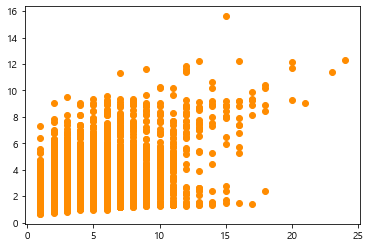

In [10]:
plt.scatter(y_test, pred, c='darkorange')

MemoryError: Unable to allocate 1.42 GiB for an array with shape (191248601,) and data type int64

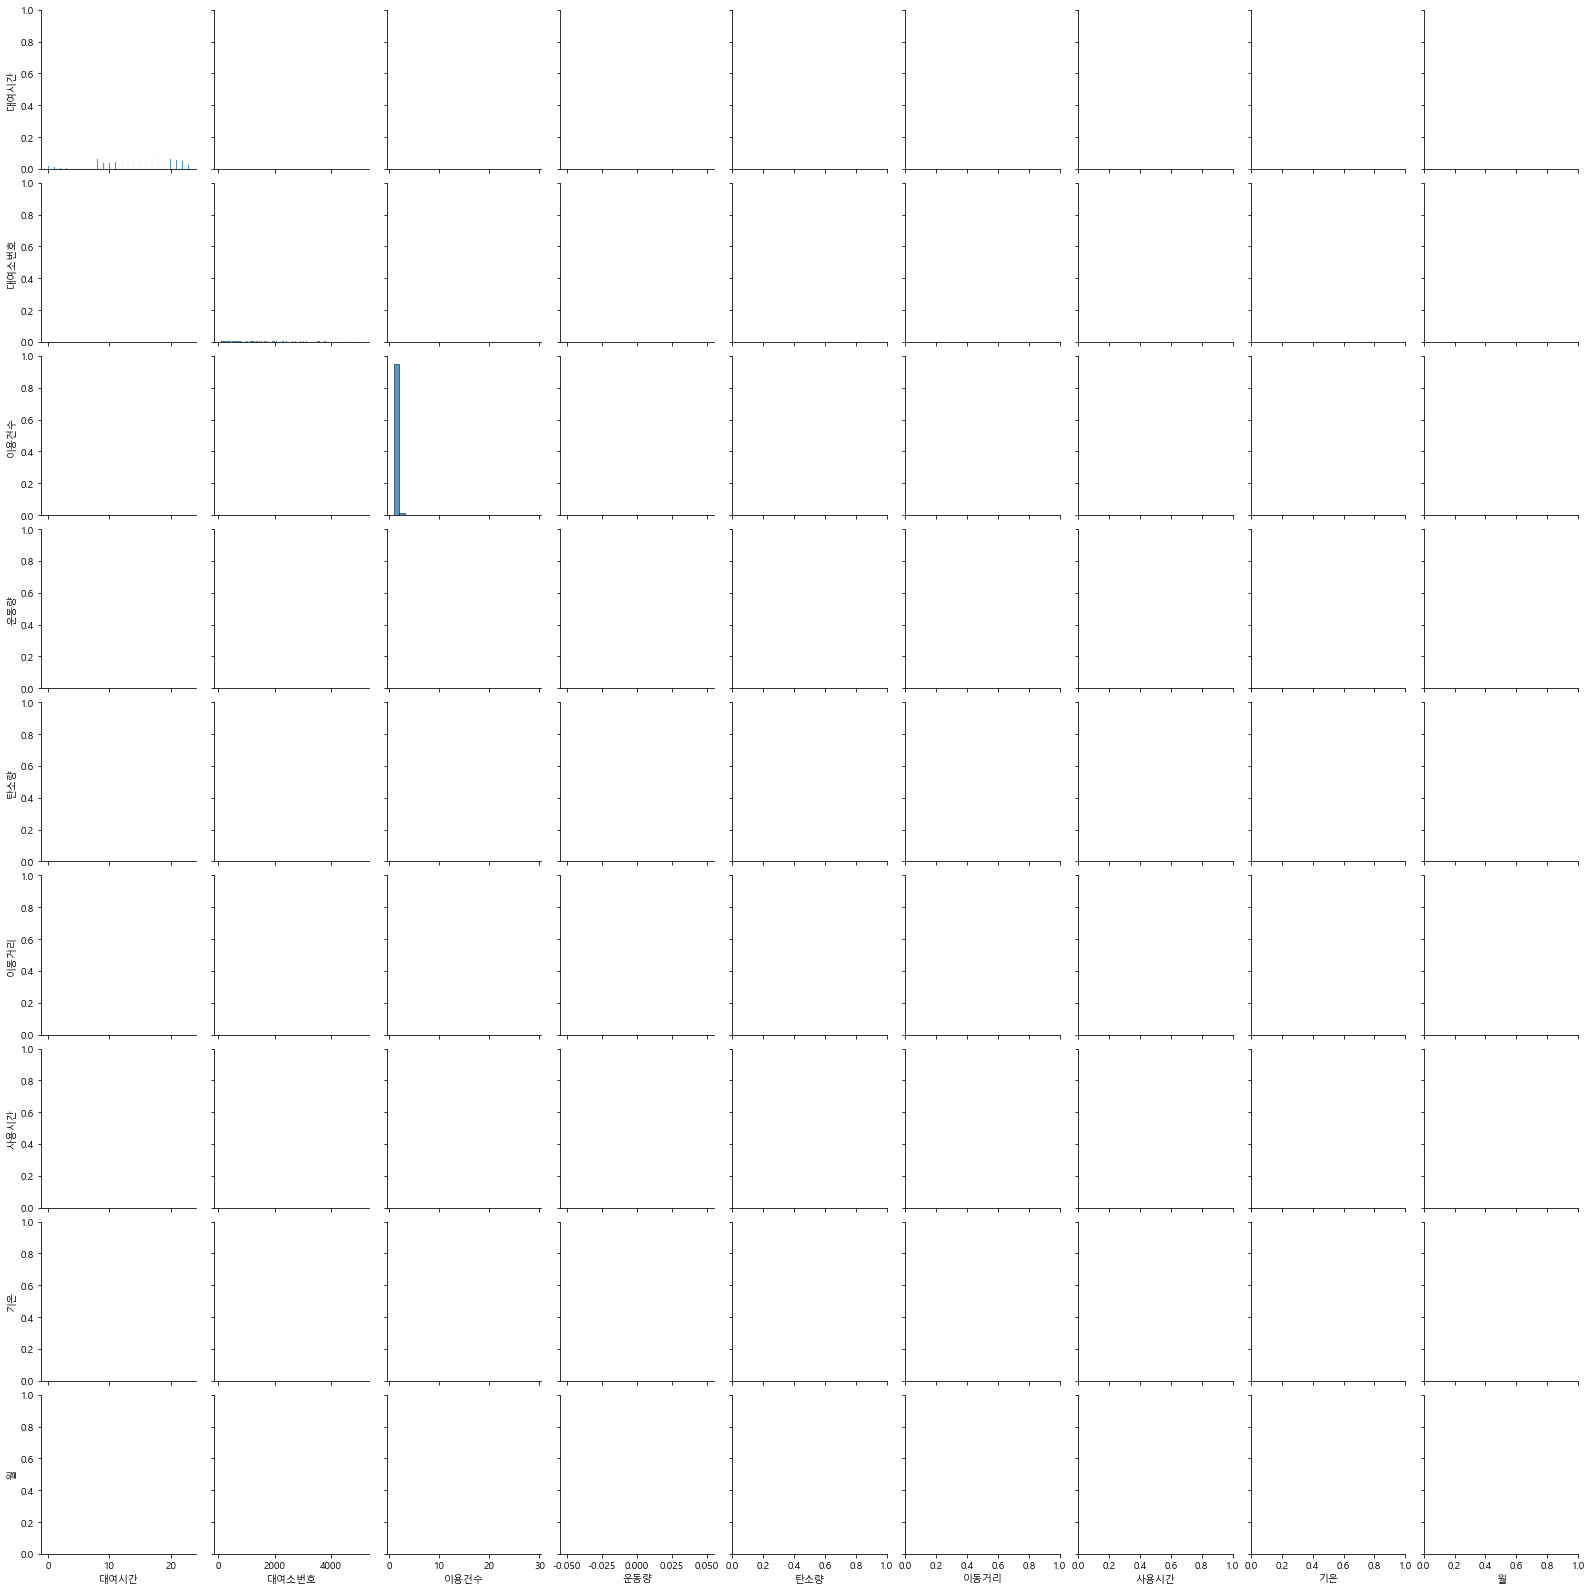

In [11]:
sns.pairplot(to)

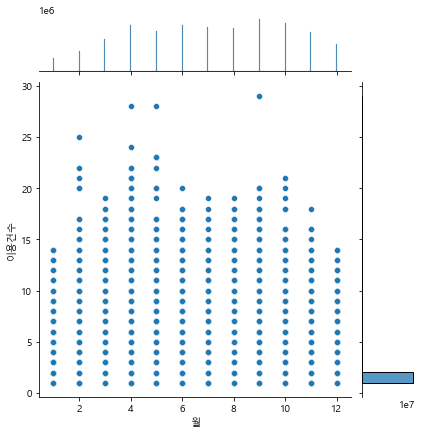

In [12]:
sns.jointplot(x='월', y='이용건수', data=to)

MemoryError: Unable to allocate 191. MiB for an array with shape (25033894,) and data type int64

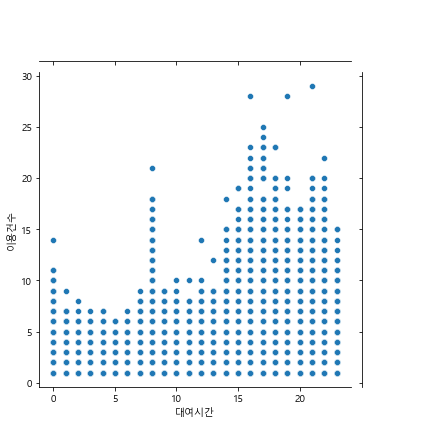

In [14]:
sns.jointplot(x='대여시간', y='이용건수', data=to)

In [19]:
knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor()
grad = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

models = [knn, lr, dt, rfr, grad, xgb, lgbm]
for m in models:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print(m.__class__.__name__)
    print('MSE:', mean_squared_error(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
    print('R2_score:', r2_score(y_test, pred))
    print('-----------------------')
    print()

KeyboardInterrupt: 

In [5]:
df19 = pd.read_csv('./total19.csv', index_col=0)
df19

,대여일자,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온,월
0,2019-01-01,0,458,1.0,41.96,0.38,1630.0,29.0,종로구,-4.8,1
1,2019-01-01,0,458,1.0,52.89,0.49,2120.0,13.0,종로구,-4.8,1
2,2019-01-01,0,458,1.0,53.54,0.48,2080.0,11.0,종로구,-4.8,1
3,2019-01-01,0,458,1.0,41.96,0.38,1630.0,29.0,종로구,-4.8,1
4,2019-01-01,0,458,1.0,52.89,0.49,2120.0,13.0,종로구,-4.8,1
...,...,...,...,...,...,...,...,...,...,...,...
14031263,2019-08-07,5,117,1.0,48.46,0.49,2110.0,7.0,서대문구,30.2,8
14031264,2019-06-07,5,2393,1.0,27.84,0.21,890.0,3.0,강남구,23.3,6
14031265,2019-11-13,15,1376,1.0,30.80,0.23,1010.0,46.0,성북구,1.8,11
14031266,2019-09-12,21,765,1.0,58.39,0.47,2020.0,16.0,양천구,20.1,9


In [6]:
df20 = pd.read_csv('./total20.csv', index_col=0)
df20

,대여일자,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온,월
0,2020-01-01,0,1044,1.0,33.96,0.30,1280.0,6.0,강동구,-4.7,1
1,2020-01-01,0,1044,1.0,169.31,1.17,5030.0,39.0,강동구,-4.7,1
2,2020-01-01,0,1044,1.0,83.26,0.68,2920.0,14.0,강동구,-4.7,1
3,2020-01-01,0,1044,1.0,33.96,0.30,1280.0,6.0,강동구,-4.7,1
4,2020-01-01,0,1044,1.0,169.31,1.17,5030.0,39.0,강동구,-4.7,1
...,...,...,...,...,...,...,...,...,...,...,...
19169092,2020-11-22,5,3130,1.0,0.00,0.00,0.0,20.0,서대문구,9.0,11
19169093,2020-08-01,13,1751,1.0,0.00,0.00,0.0,8.0,도봉구,24.7,8
19169094,2020-09-07,17,1762,1.0,0.00,0.00,0.0,3.0,도봉구,21.5,9
19169095,2020-11-22,7,1571,1.0,0.00,0.00,0.0,10.0,강북구,7.2,11


In [8]:
df21 = pd.read_csv('./total21.csv', index_col=0)
df21

,대여일자,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온,월
0,2021-01-01,0,1347,2.0,28.90,0.23,992.78,13.0,성북구,-5.2,1
1,2021-01-01,0,1347,1.0,11.24,0.07,283.72,1.0,성북구,-5.2,1
2,2021-01-01,0,1349,1.0,34.38,0.26,1127.50,10.0,성북구,-5.2,1
3,2021-01-01,0,1349,1.0,116.20,0.87,3761.85,20.0,성북구,-5.2,1
4,2021-01-01,0,1390,1.0,29.88,0.29,1257.62,20.0,성북구,-5.2,1
...,...,...,...,...,...,...,...,...,...,...,...
25033962,2021-04-30,4,3806,1.0,38.19,0.24,1048.39,5.0,관악구,14.1,4
25033963,2021-10-19,1,4633,1.0,0.00,0.00,0.00,13.0,용산구,14.1,10
25033964,2021-11-21,22,4633,1.0,24.03,0.20,842.77,5.0,용산구,5.4,11
25033965,2021-10-10,14,3973,1.0,88.70,0.74,3200.00,80.0,금천구,15.6,10


In [12]:
df21[df21['대여일자'] == '2021-01-01']

,대여일자,대여시간,대여소번호,이용건수,운동량,탄소량,이동거리,사용시간,자치구,기온,월
0,2021-01-01,0,1347,2.0,28.90,0.23,992.78,13.0,성북구,-5.2,1
1,2021-01-01,0,1347,1.0,11.24,0.07,283.72,1.0,성북구,-5.2,1
2,2021-01-01,0,1349,1.0,34.38,0.26,1127.50,10.0,성북구,-5.2,1
3,2021-01-01,0,1349,1.0,116.20,0.87,3761.85,20.0,성북구,-5.2,1
4,2021-01-01,0,1390,1.0,29.88,0.29,1257.62,20.0,성북구,-5.2,1
...,...,...,...,...,...,...,...,...,...,...,...
25031401,2021-01-01,9,1827,1.0,0.00,0.00,0.00,37.0,금천구,-0.9,1
25031402,2021-01-01,9,1856,1.0,32.08,0.21,900.00,4.0,금천구,-0.9,1
25031403,2021-01-01,9,1862,1.0,0.00,0.00,0.00,5.0,금천구,-0.9,1
25031404,2021-01-01,9,1828,1.0,0.00,0.00,0.00,18.0,금천구,-0.9,1


In [16]:
df21_m = df21.groupby('대여일자')['기온','월'].mean()
df21_m

,기온,월
대여일자,,
2021-01-01,-3.598855,1.0
2021-01-02,-5.760299,1.0
2021-01-03,-5.460790,1.0
2021-01-04,-1.930982,1.0
2021-01-05,-8.052868,1.0
...,...,...
2021-12-27,-5.585083,12.0
2021-12-28,-1.150221,12.0
2021-12-29,-1.370894,12.0


In [20]:
df21_a = pd.merge(df21_m, df21_y, on= '대여일자')
df21_a

,기온,월,이용건수
대여일자,,,
2021-01-01,-3.598855,1.0,21310.0
2021-01-02,-5.760299,1.0,22705.0
2021-01-03,-5.460790,1.0,21013.0
2021-01-04,-1.930982,1.0,31756.0
2021-01-05,-8.052868,1.0,27994.0
...,...,...,...
2021-12-27,-5.585083,12.0,38061.0
2021-12-28,-1.150221,12.0,45885.0
2021-12-29,-1.370894,12.0,46522.0


In [18]:
df21_y = df21.groupby('대여일자')['이용건수'].sum()
df21_y

대여일자
2021-01-01    21310.0
2021-01-02    22705.0
2021-01-03    21013.0
2021-01-04    31756.0
2021-01-05    27994.0
               ...   
2021-12-27    38061.0
2021-12-28    45885.0
2021-12-29    46522.0
2021-12-30    43954.0
2021-12-31    36340.0
Name: 이용건수, Length: 363, dtype: float64

In [22]:
df21_a.sort_values('기온', ascending=False)

,기온,월,이용건수
대여일자,,,
2021-07-26,30.435578,7.0,93256.0
2021-07-24,30.383868,7.0,73776.0
2021-07-25,30.316813,7.0,64787.0
2021-07-22,30.175219,7.0,94079.0
2021-07-23,30.065927,7.0,92452.0
...,...,...,...
2021-12-26,-10.522180,12.0,14697.0
2021-01-09,-11.058648,1.0,8733.0
2021-12-25,-12.729250,12.0,16854.0


In [24]:
df21_a.sort_values('이용건수', ascending=False).head(20)

,기온,월,이용건수
대여일자,,,
2021-09-02,22.994379,9.0,235581.0
2021-04-28,13.808868,4.0,204994.0
2021-04-27,14.783903,4.0,150715.0
2021-09-24,21.453872,9.0,131882.0
2021-09-03,22.358538,9.0,130244.0
2021-09-17,22.120647,9.0,129092.0
2021-10-13,18.902252,10.0,127886.0
2021-10-14,18.703065,10.0,126804.0
2021-09-30,19.625895,9.0,126702.0
